<a href="https://colab.research.google.com/github/Jash7447/TextToImage-using-Segmind-Stable-Diffusion-1B-SSD1B/blob/main/TextToImage_SSDb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install git+https://github.com/huggingface/diffusers
!pip install transformers accelerate safetensors

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-rrj74_cs
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-rrj74_cs
  Resolved https://github.com/huggingface/diffusers to commit 9135e54e768a59ddcf8ad18818d2ffe69ea3a32a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [16]:
from diffusers import StableDiffusionXLPipeline
import torch

In [17]:
pipe = StableDiffusionXLPipeline.from_pretrained(
    "segmind/SSD-1B",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.22.0.dev0",
  "_name_or_path": "segmind/SSD-1B",
  "force_zeros_for_empty_prompt": true,
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [18]:
%time
from transformers.pipelines.image_to_text import Image
from IPython.display import display

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.68 µs


In [22]:
prompt = "A flower grown in space"
neg_prompt = "ugly, blurry, poor quality"

image = pipe(prompt=prompt, negative_prompt=neg_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

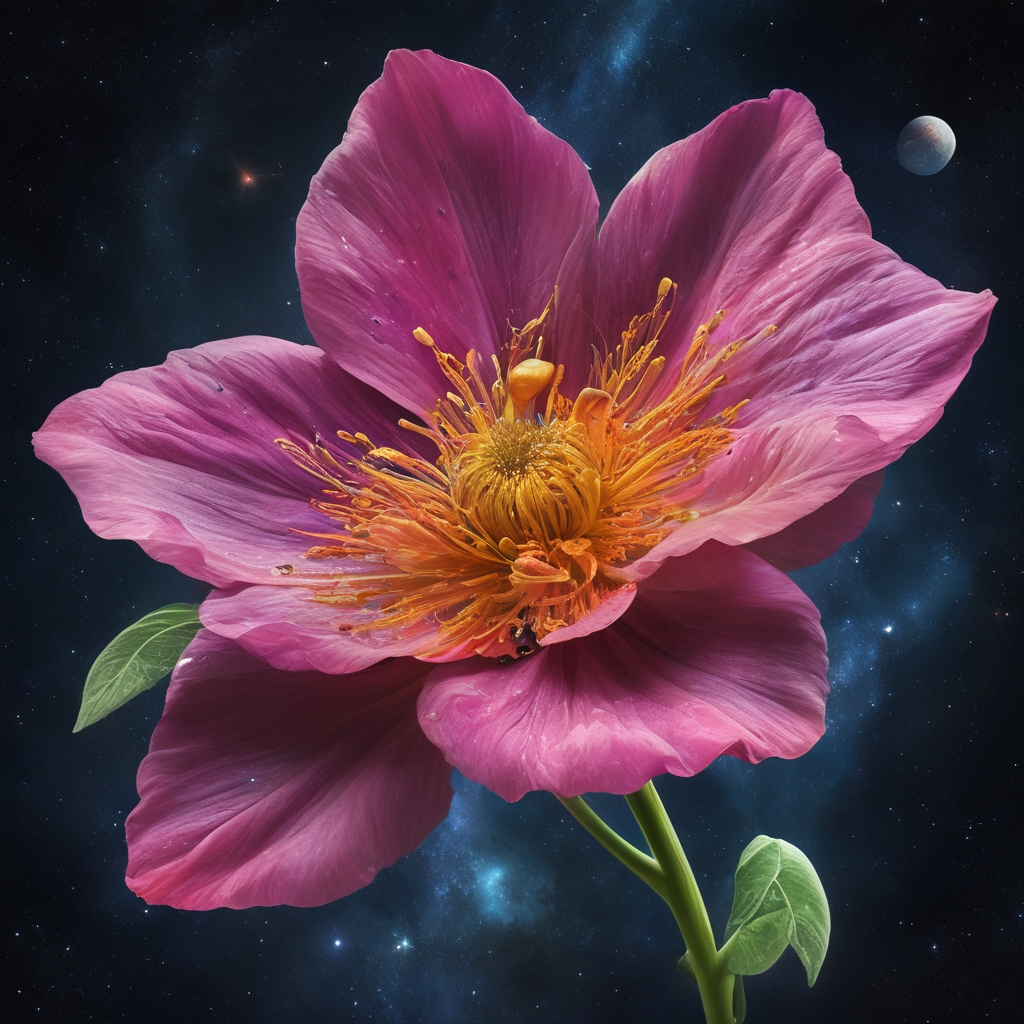

In [23]:
display(image)